In [1]:
import pickle
from datetime import datetime
from datetime import timedelta
import obspy
from obspy.clients.fdsn.client import Client

In [12]:
# Read in waveform data from miniseed
st = obspy.read('DT0067__.ELZ')

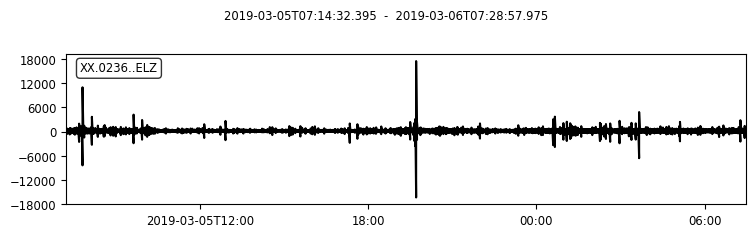

In [13]:
st.plot();

In [17]:
# Read in earthquake times
with open('earthquake_times_2019', 'rb') as f:
    eq_times = pickle.load(f)

In [18]:
# Get earthquake times for the desired day
t1 = st[0].stats.starttime
t2 = t1 + timedelta(days=1)
day_times = [t for t in eq_times if (t>t1) & (t<t2)]

In [ ]:
# Cut around earthquake times and plot
for t in day_times:
    start = obspy.UTCDateTime(t) - 10
    end = obspy.UTCDateTime(t) + 15
    cut_st = st.copy().trim(start,end)
    cut_st.filter('bandpass',freqmin=4,freqmax=15)
    cut_st.trim(obspy.UTCDateTime(t)-5,obspy.UTCDateTime(t)+10)
    cut_st.plot();

## Now test PSD

In [20]:
from obspy import read
from obspy.io.xseed import Parser
from obspy.signal import PPSD
import obspy
import matplotlib.pyplot as plt

In [23]:
st = obspy.read('DT0067__.ELZ')
tr = st.select(id="XX.0236..ELZ")[0]

In [24]:
inv = obspy.core.inventory.inventory.read_inventory("OO.xml")
ppsd = PPSD(tr.stats, metadata=inv)

In [25]:
ppsd.add(st)

/opt/anaconda3/envs/alaska-ml/lib/python3.9/site-packages/obspy/signal/spectral_estimation.py:968: UserWarning: Error getting response from provided metadata:
Exception: No matching response information found.
Skipping time segment(s).
  warnings.warn(msg)


False